In [3]:
from Manuel_BayesTRPL_Utilities import *
from Manuel_BayesTRPL_Plotting import *

Files ready...
(10, 1000)


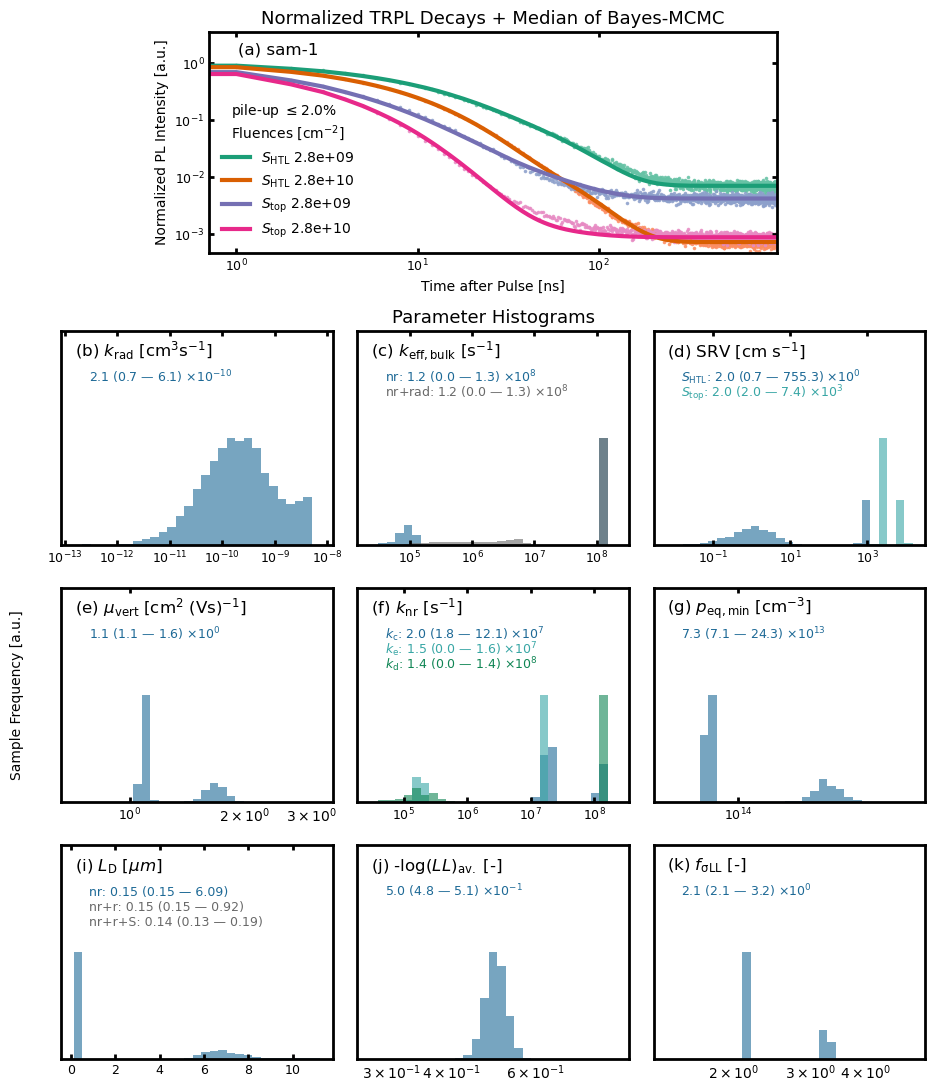

In [7]:
folder = r"Example_Data"
trace_file = r"trace_.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'bot'
side_2 = 'top'
SRV_display = 'topbot' # 'topbot' or 'upperlower'
scaling = 'log'

trace = az.from_netcdf(f'{folder}/{trace_file}')

filter = np.where(trace.posterior.k_rad.values.ravel() > 0)

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, bckg_list, PN_on_off, diffusion_on_off = Bayes_TRPL_Utils(folder, trace_file)
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2, SRV_display, bckg_list, PN_on_off, diffusion_on_off, filter)

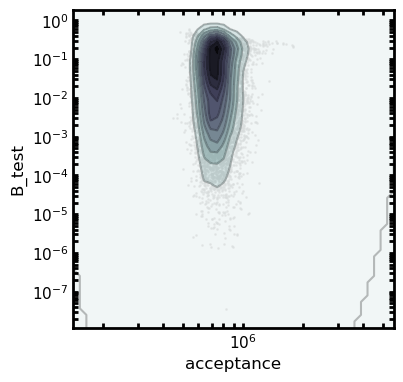

In [15]:
kd = df_save['k_emission(s-1)']
keff = df_save['k_nr_eff(s-1)']

corner_plot_single(kd, keff/kd, 'acceptance', 'B_test', ' ')